In [1]:
#Importing libraries 
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
#Importing dataset
companies = pd.read_csv('1000_Companies.csv')
#Extracting Indipendnt and Dependent variables
X = companies.iloc[:, :-1]
y =companies.iloc[:, 4]

In [3]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [5]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [6]:
companies.corr(numeric_only=True)

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


<Axes: >

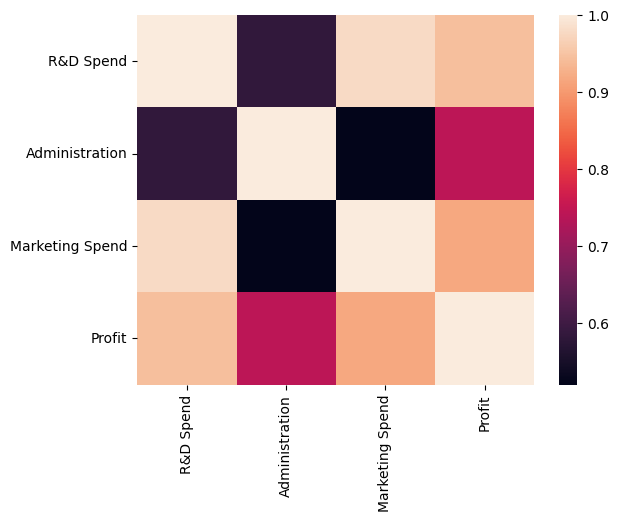

In [9]:
#companies.drop('State', axis=1, inplace=True) to permanently drop the column from the dataset
#companies = companies[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']] temporarily drops the left column
sns.heatmap(companies.corr(numeric_only=True))

In [10]:
X = pd.get_dummies(X, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# model.fit(X_train, y_train)
#or 
model.fit(X_train.values, y_train.values)

LinearRegression()

In [13]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.800,471784.1000,False,True
1,162597.70,151377.590,443898.5300,False,False
2,153441.51,101145.550,407934.5400,True,False
3,144372.41,118671.850,383199.6200,False,True
4,142107.34,91391.770,366168.4200,True,False
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,False,False
996,134970.00,130390.080,329204.0228,False,False
997,100275.47,241926.310,227142.8200,False,False
998,128456.23,321652.140,281692.3200,False,False


In [14]:
#Regression Coefficients and the Intercept
#model.coef_
#model.intercept_
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
R&D Spend,0.525846
Administration,0.844391
Marketing Spend,0.107574
State_Florida,-880.536598
State_New York,-698.169073


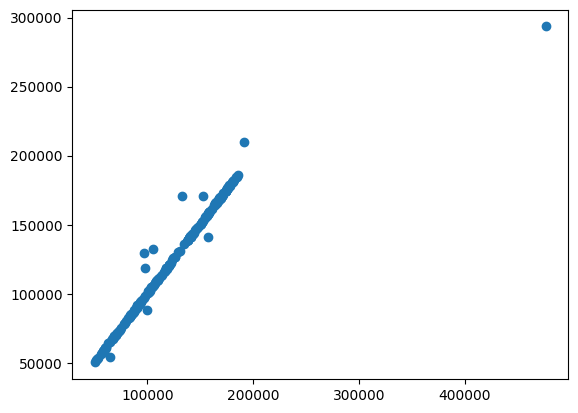

In [15]:
# y_pred = model.predict(X_test)
# plot.scatter(y_test, y_pred)
#or
y_pred = model.predict(X_test.values)
plot.scatter(y_test, y_pred)

In [16]:
from sklearn import metrics
print('Mean Absolute Error      :', metrics.mean_absolute_error(y_test , y_pred))
print('Mean Squared Error       :', metrics.mean_squared_error(y_test , y_pred))
print('Root Mean Squared Error  :', np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R Squared Value          :', metrics.r2_score(y_test , y_pred))

Mean Absolute Error      : 2300.221750983344
Mean Squared Error       : 192148061.81508124
Root Mean Squared Error  : 13861.748151480795
R Squared Value          : 0.9112695892268794


In [17]:
cdf=pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficients'])
cdf

,Coefficients
R&D Spend,0.525846
Administration,0.844391
Marketing Spend,0.107574
State_Florida,-880.536598
State_New York,-698.169073


In [18]:
X_test.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida',
       'State_New York'],
      dtype='object')

In [20]:
# To predict the profit for State_California with:
# R&D Spend: 132455.87
# Administration: 1235674.98 
# Marketing Spend: 678343
# Dummy Variable for both State_Florida and State_New York will be zero.
state_califonia_profit = model.predict([[132455.87, 1235674.98, 678343,0,0]])
print(state_califonia_profit)

[1134981.06902511]
